In [ ]:
#掛載 GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


全部輪廓


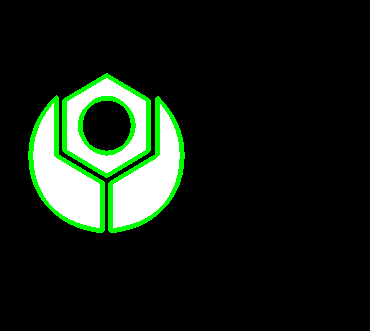

第2群輪廓


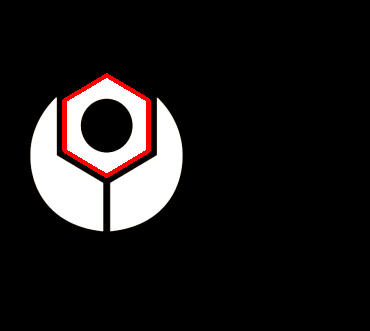

(None, None)

In [19]:
'''輪廓特徵分析'''
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

pathname = '/content/gdrive/My Drive/Colab Notebooks/'
filename = 'data/logo.jpg'
img = cv2.imread(pathname + filename)
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) #縮小一倍
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #轉成灰階影像
ret, thresh = cv2.threshold(imgray, 127, 255, 0) #8位元灰階影像二值化，以127為門檻

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#1.輸入的黑白二值影像, 2.建立樹狀輪廓結構, 3.刪去水平與垂直的線，留下轉角點

img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0,255,0), 3)
print('全部輪廓'), cv2_imshow(img2)
img3 = img.copy()
cv2.drawContours(img3, contours, 2, (0,0,255), 3)
print('第3群輪廓'), cv2_imshow(img3)

矩形
矩形長寬比:0.54887


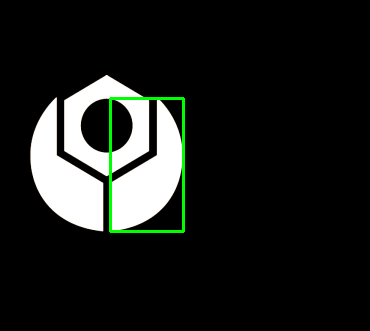

In [21]:
cnt = contours[0] #取第一群輪廓
x,y,w,h = cv2.boundingRect(cnt)
img4 = img.copy()
cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)
aspect_ratio = float(w)/h
print('矩形')
print('矩形長寬比:'+str(round(aspect_ratio,5)))
cv2_imshow(img4)

面積:4551.0
最小矩形


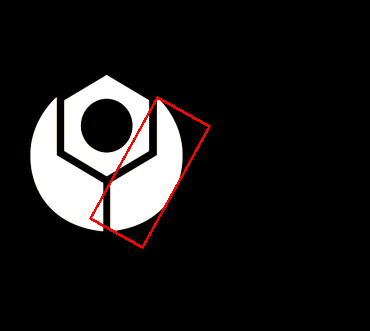

(None, None)

In [22]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img5 = img.copy()
cv2.drawContours(img5,[box],0,(0,0,255),2)
area = cv2.contourArea(cnt)
print('面積:'+str(area))
print('最小矩形'), cv2_imshow(img5)

最小圓形


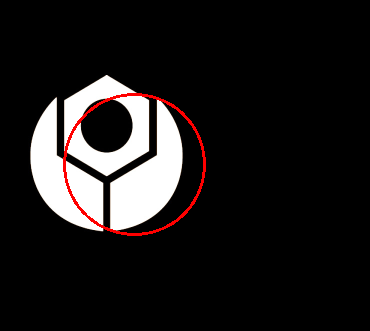

(None, None)

In [23]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img6 = img.copy()
cv2.circle(img6,center,radius,(0,0,255),2)
print('最小圓形'), cv2_imshow(img6)

角度: 20.0
橢圓形擬合


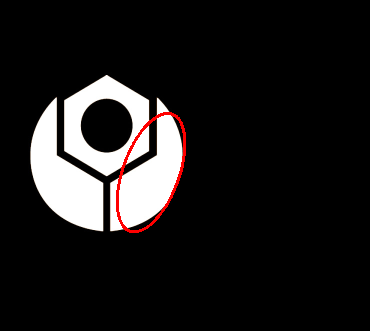

(None, None)

In [24]:
ellipse = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
img7 = img.copy()
cv2.ellipse(img7,ellipse,(0,0,255),2)
print('角度: '+str(round(angle,2)))
print('橢圓形擬合'), cv2_imshow(img7)

直線擬合


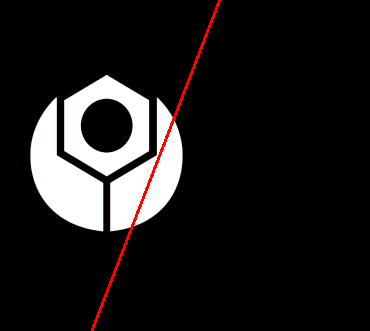

(None, None)

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img8 = img.copy()
cv2.line(img8,(cols-1,righty),(0,lefty),(0,0,255),2)
print('直線擬合'), cv2_imshow(img8)

凸多邊形擬合


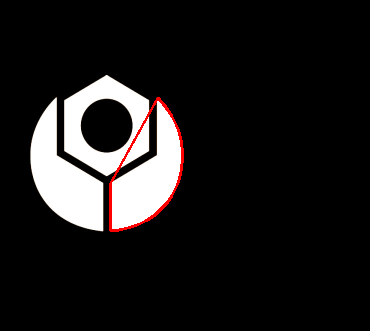

(None, None)

In [26]:
# create hull array for convex hull points
hull = []

#calculate points for each contour
for i in range(len(cnt)):
    #creating convex hull object for each contour
    hull.append(cv2.convexHull(cnt, False))

img9 = img.copy()
# draw contours and hull points
for i in range(len(cnt)):
    cv2.drawContours(img9, hull, i, (0,0,255), 2)
print('凸多邊形擬合'), cv2_imshow(img9)



遮罩


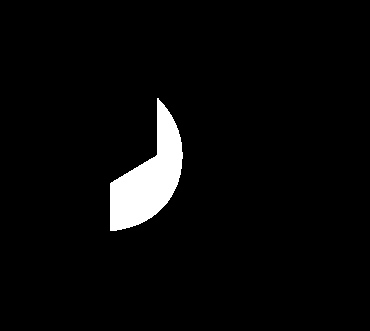

(None, None)

In [25]:
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
print('遮罩'), cv2_imshow(mask)